In [ ]:
# some example data
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mdata = pandas.read_excel('base var.xlsx')

# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str

quarterly = dates_from_str(quarterly)

mdata = mdata[['riesgo pais','desempleo','PBI 2007 = 100', 'Inflación', 
               'interes interbancario', 'pbi percapita (2007 = 100)', 'Deficit fiscal', 
               'VIX', 'Reservas internacionales', 'Términos de Intercambio']]

mdata.index = pandas.DatetimeIndex(quarterly)

data = np.log(mdata).diff().dropna()

# make a VAR model
model = VAR(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,riesgo pais,desempleo,PBI 2007 = 100,Inflación,interes interbancario,pbi percapita (2007 = 100),Deficit fiscal,VIX,Reservas internacionales,Términos de Intercambio
2010-03-31,178,8.6,106.153026,0.30,1.048710,100.000000,137.000000,23.158,34342,100.024524
2010-06-30,199,9.6,106.146323,0.32,1.211071,99.931924,331.583333,22.374,35010,99.945273
2010-09-30,157,9.2,115.833732,0.28,1.230323,108.984862,526.166667,18.244,35269,98.864768
2010-12-31,143,9.0,117.484525,0.03,1.221333,110.469860,720.750000,19.908,35049,101.373261
2011-03-31,201,7.7,123.028903,0.24,1.442581,115.611877,915.333333,30.872,34610,105.190809
...,...,...,...,...,...,...,...,...,...,...
2033-03-31,144,6.4,164.440198,-0.02,3.594333,141.706574,-4382.666667,10.554,64360,100.487970
2033-06-30,139,6.2,165.157201,-0.47,3.501613,142.102422,-4234.750000,10.452,63560,102.020748
2033-09-30,138,6.6,162.217614,-0.20,3.322000,139.355782,-4086.833333,11.084,62983,103.561099
2033-12-31,136,6.5,178.887888,0.10,3.260000,153.437669,-3938.916667,11.350,63621,102.381007


In [ ]:
results = model.fit(2)
#results.summary()

In [ ]:
results.summary()

LinAlgError: ignored

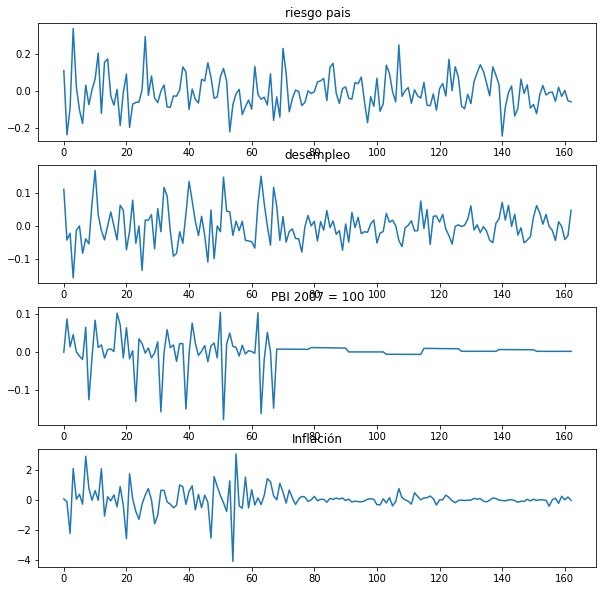

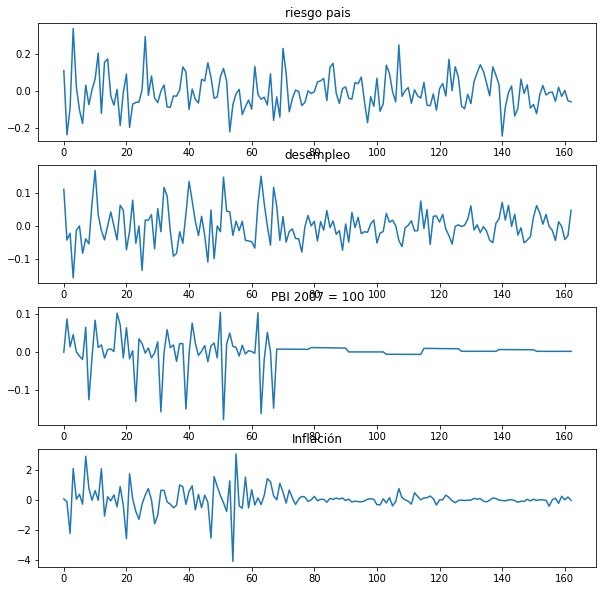

In [ ]:
results.plot()

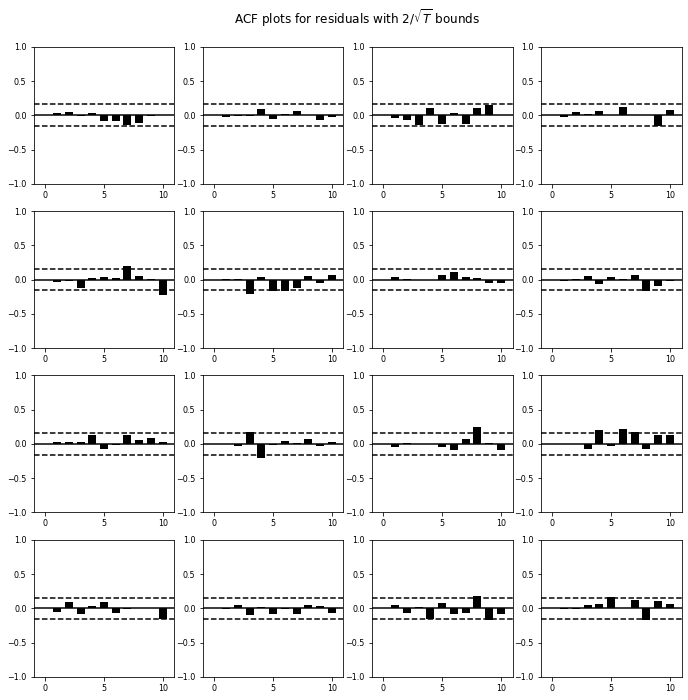

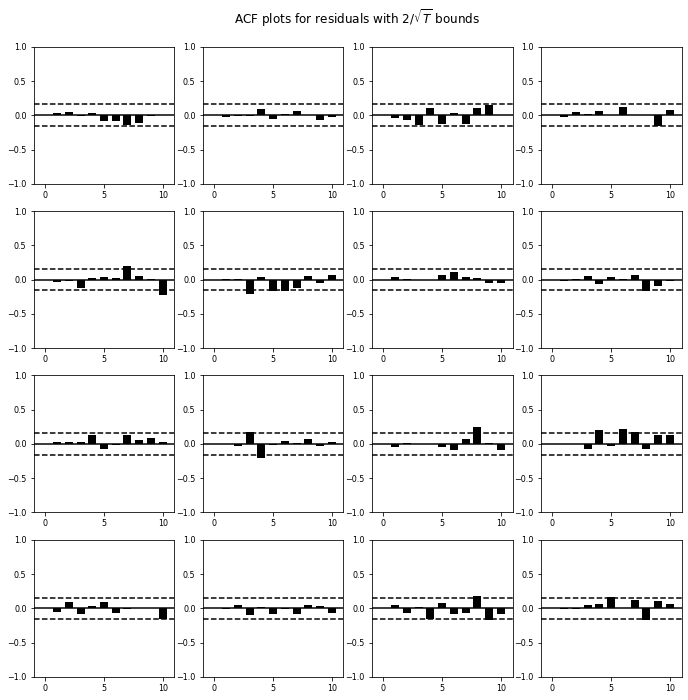

In [ ]:
results.plot_acorr()

In [ ]:
model.select_order(15)

In [ ]:
results = model.fit(maxlags=15, ic='aic')

In [ ]:
lag_order = results.k_ar

In [ ]:
results.forecast(data.values[-lag_order:], 5)

array([[-0.01779746,  0.01581905, -0.01652091,  0.04378964],
       [-0.01632491,  0.01361325, -0.02773118,  0.17095697],
       [-0.01384633,  0.01722614,  0.00284263, -0.45040176],
       [ 0.02611165,  0.01776027, -0.01138928,  0.42658223],
       [ 0.02771348, -0.00552253,  0.00822133,  0.4442955 ]])

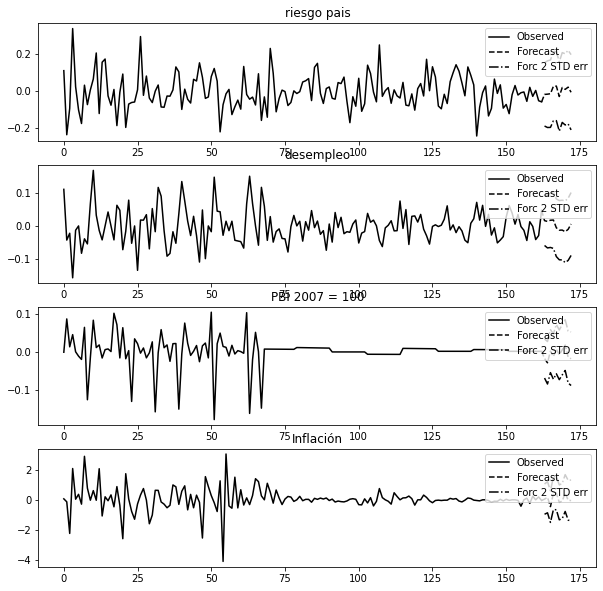

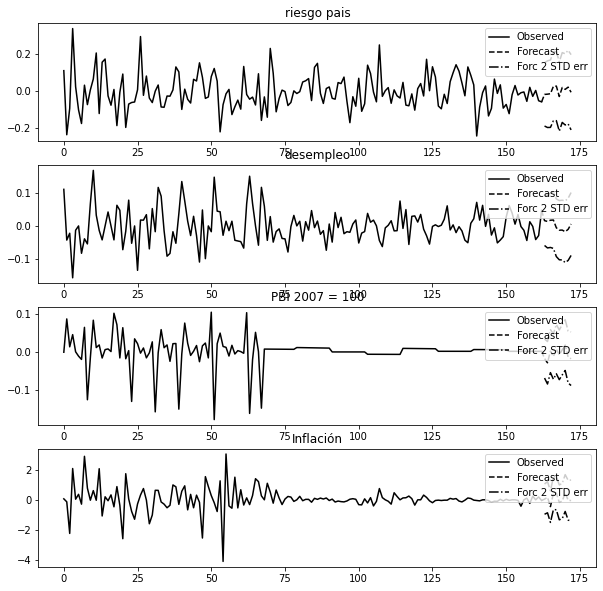

In [ ]:
results.plot_forecast(10)

In [ ]:
irf = results.irf(10)

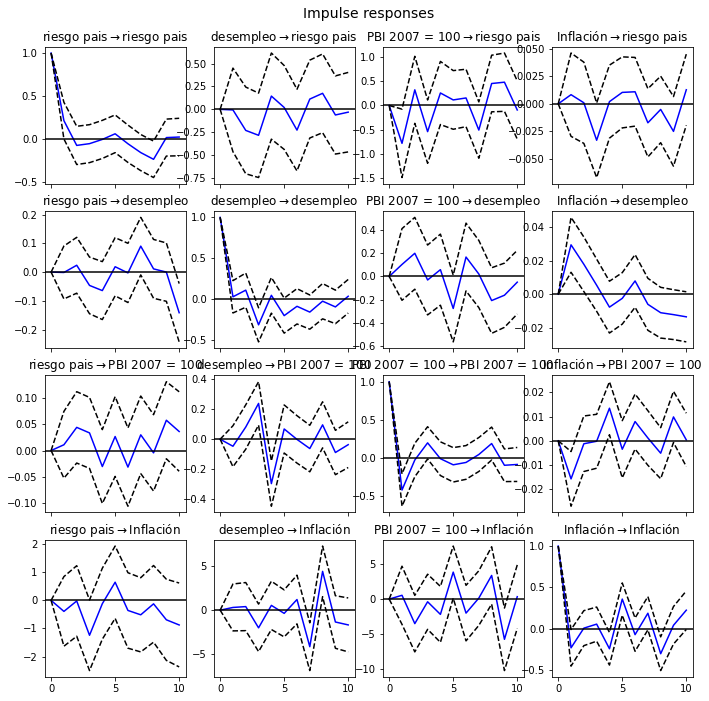

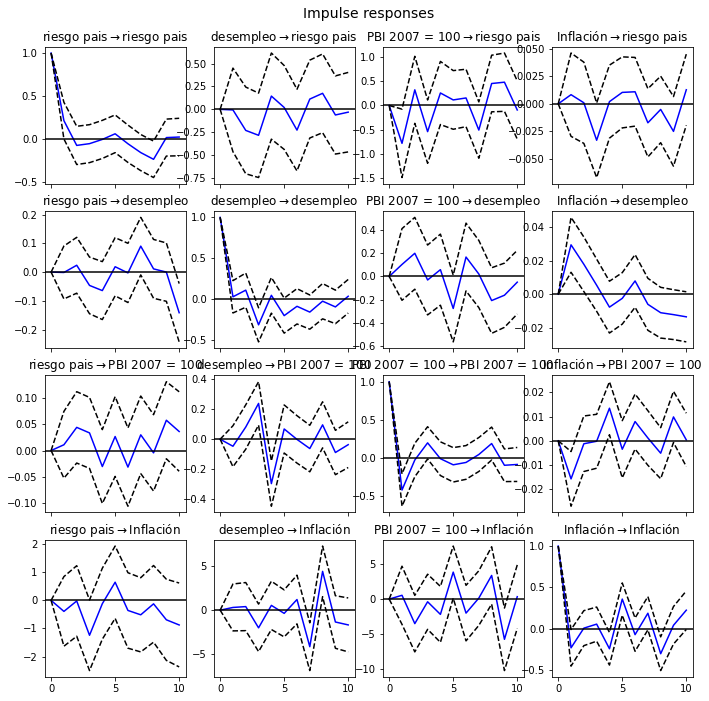

In [ ]:
irf.plot(orth=False)

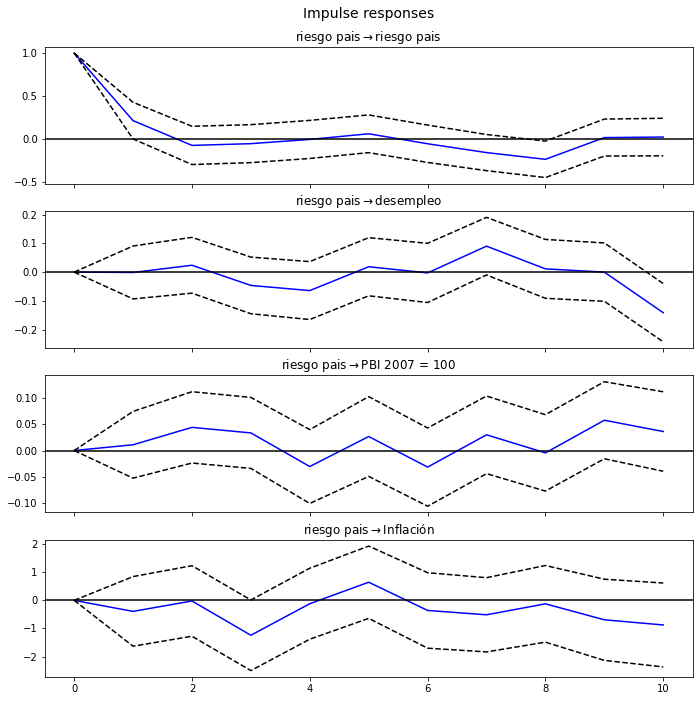

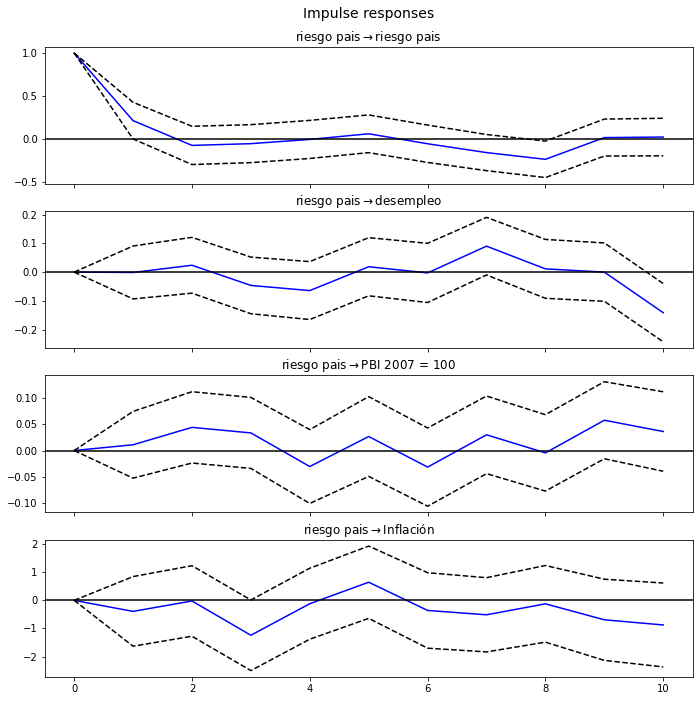

In [ ]:
irf.plot(impulse='riesgo pais')

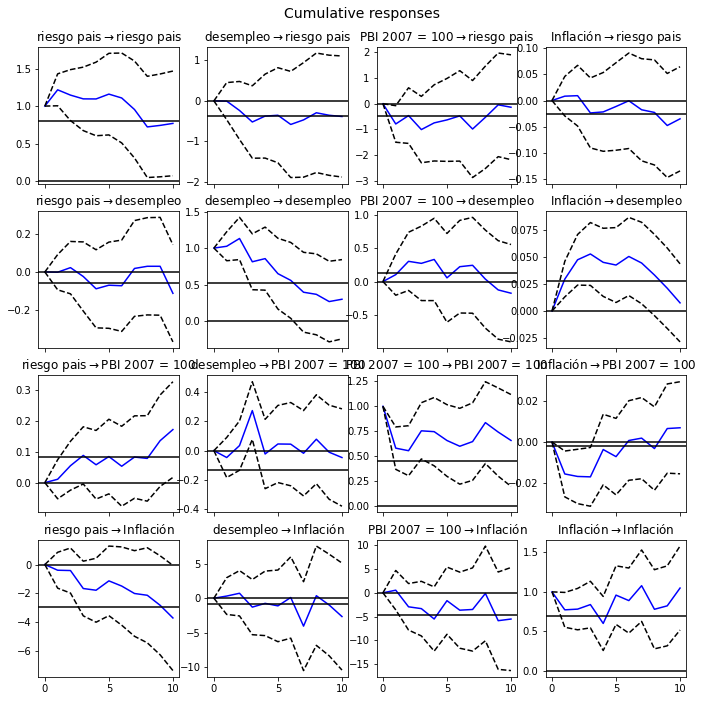

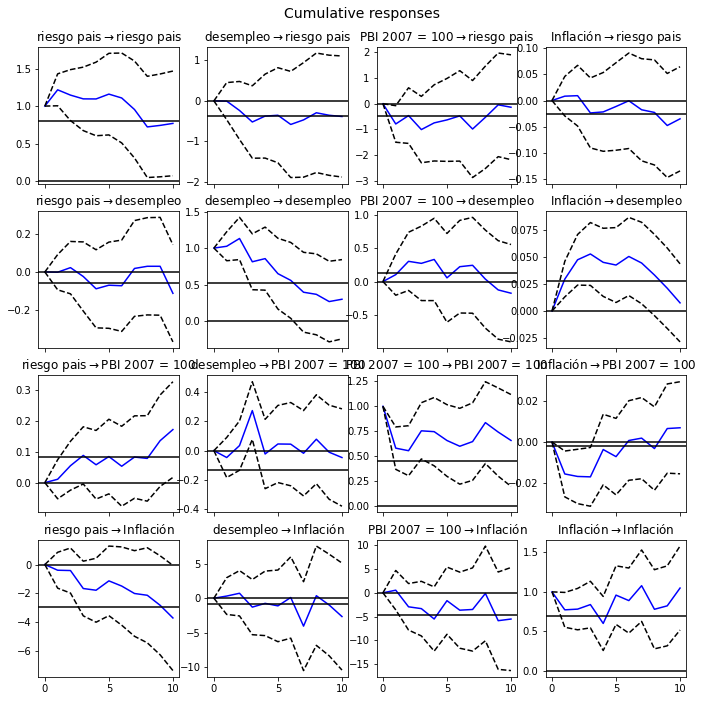

In [ ]:
irf.plot_cum_effects(orth=False)

In [ ]:
fevd = results.fevd(5)

In [ ]:
fevd.summary()

FEVD for riesgo pais
     riesgo pais  desempleo  PBI 2007 = 100  Inflación
0       1.000000   0.000000        0.000000   0.000000
1       0.940874   0.000451        0.056851   0.001824
2       0.924070   0.010537        0.063581   0.001811
3       0.883088   0.020536        0.067555   0.028821
4       0.876926   0.022855        0.071508   0.028710

FEVD for desempleo
     riesgo pais  desempleo  PBI 2007 = 100  Inflación
0       0.043958   0.956042        0.000000   0.000000
1       0.038837   0.837045        0.005069   0.119048
2       0.037298   0.801712        0.006675   0.154315
3       0.035718   0.810791        0.007870   0.145621
4       0.052285   0.787337        0.012200   0.148178

FEVD for PBI 2007 = 100
     riesgo pais  desempleo  PBI 2007 = 100  Inflación
0       0.000062   0.009766        0.990172   0.000000
1       0.003527   0.009417        0.917602   0.069453
2       0.016096   0.020512        0.895239   0.068154
3       0.015467   0.093584        0.829994   0.060956

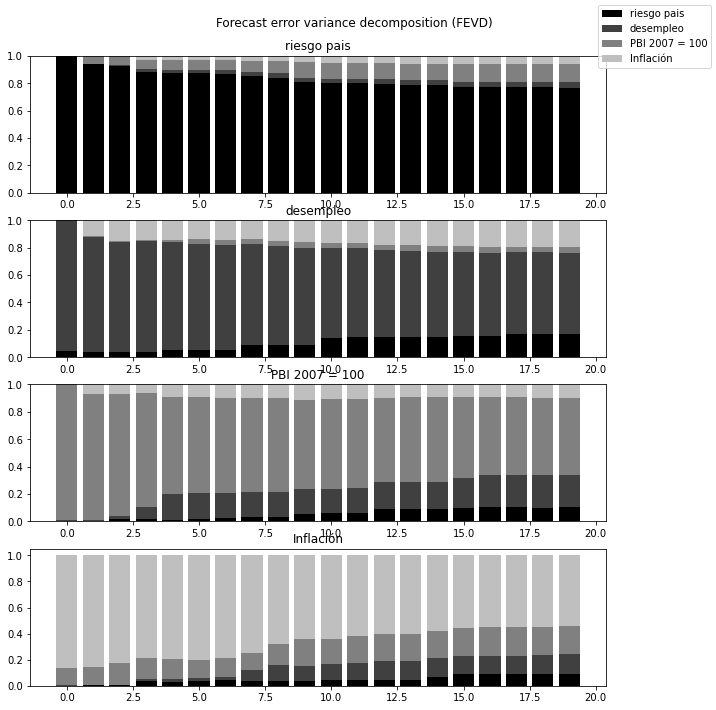

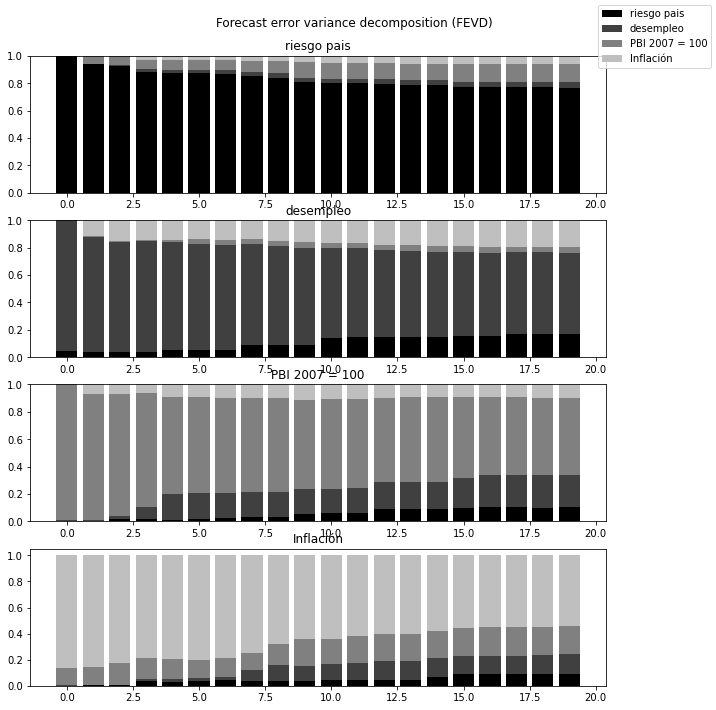

In [ ]:
results.fevd(20).plot()

In [ ]:
results.test_causality('realgdp', ['realinv', 'realcons'], kind='f')

ValueError: ignored